In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


 # Section 1

## Get and explore the data

In [2]:
insurance_data = pd.read_csv('./insurance.csv')

In [3]:
insurance_data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
insurance_data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

### 1- How is age related to medical costs?

<AxesSubplot:xlabel='age', ylabel='charges'>

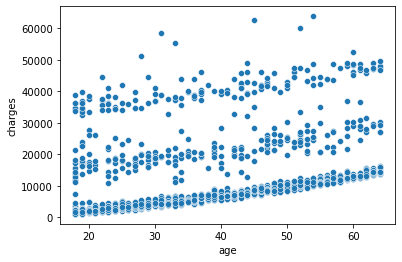

In [6]:
sns.scatterplot(data = insurance_data, x = 'age', y ='charges')

As people gets older, medical expenses also increase

### 2- How is number of children related to medical costs?

In [20]:
children = insurance_data.groupby('children').mean()[['charges']].reset_index()
children

,children,charges
0,0,12365.975602
1,1,12731.171832
2,2,15073.563734
3,3,15355.318367
4,4,13850.656311
5,5,8786.035247


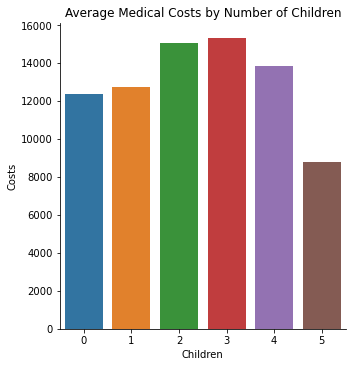

In [25]:
g = sns.catplot(data=children, kind='bar', x='children', y='charges')
for ax in g.axes.flat:
    ax.set(title='Average Medical Costs by Number of Children',
           xlabel='Children',
           ylabel='Costs')

Medical costs tend to increase with the number of children until three. After that, they decrease. This could be due to the limited data available for individuals with more than three children, as shown in the table below.

In [21]:
insurance_data.groupby('children').count()[['age']]

,age
children,
0,574
1,324
2,240
3,157
4,25
5,18


### 3- How is the number of people distributed by region?

In [27]:
insurance_data.groupby('region').count()[['charges']]

,charges
region,
northeast,324
northwest,325
southeast,364
southwest,325


<AxesSubplot:ylabel='region'>

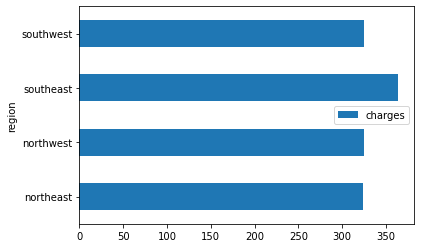

In [28]:
insurance_data.groupby('region').count()[['charges']].plot(kind = 'barh')

### 4- How is the number of people distributed by age?

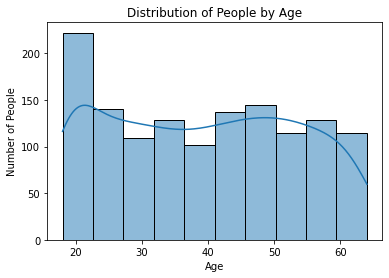

In [33]:
sns.histplot(data=insurance_data, x='age', bins=10, kde=True)
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.title('Distribution of People by Age')
plt.show()

The majority of individuals fall within the age range of 20 to 40, and there is another significant group concentrated between the ages of 60 and 80.

### 5- How are the charges distributed?

In [34]:
insurance_data.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

<AxesSubplot:ylabel='Density'>

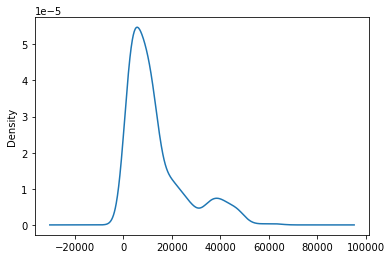

In [35]:
insurance_data.charges.plot(kind = 'kde')

The majority of expenses are below 20,000, but there are charges that extend up to approximately 63,000.